In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)
import sys
from pylab import *
import os
import urllib.request
import itertools
import seaborn as sns
import numpy as np
from adjustText import adjust_text

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

pd.options.mode.chained_assignment = None

In [3]:
YEAR = 2020
data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

In [4]:
#remove deprecated columns
data.drop(['passer_player_name', 'passer_player_id',
           'rusher_player_name', 'rusher_player_id',
           'receiver_player_name', 'receiver_player_id'],
          axis=1, inplace=True)

In [5]:
#remove plays that are not penalties, passes, or runs or have null epa
data = data.loc[(data.play_type.isin(['no_play','pass','run'])) & (data.epa.isna()==False)]

In [6]:
#make sure QB scrambles are labeled appropriately
data.play_type.loc[data['pass']==1] = 'pass'
data.play_type.loc[data.rush==1] = 'run'

In [7]:
#clean up index after data clean up
data.reset_index(drop=True, inplace=True)

In [8]:
penalties = data.loc[(data['play_type']=='no_play') & ~(data.desc.str.contains('Timeout'))][['play_type', 'desc', 'epa', 'play_id']]
penalties = penalties.groupby(['play_type'], as_index=False).agg({'epa':'mean', 'play_id':'count'})
#penalties

In [9]:
#group by without making it the index!
passvrush = data[['play_id', 'down', 'ydstogo', 'play_type', 'desc', 'wp', 'epa']]
passvrush = passvrush.loc[(passvrush['down'] == 2.0) & (passvrush['ydstogo'] >= 7) & (passvrush['wp'] > .2) & (passvrush['wp'] < .8)]
#passvrush

In [10]:
secdowngroups = passvrush.groupby(['play_type'], as_index=False).agg({'epa':'mean', 'play_id':'count'})
#secdowngroups

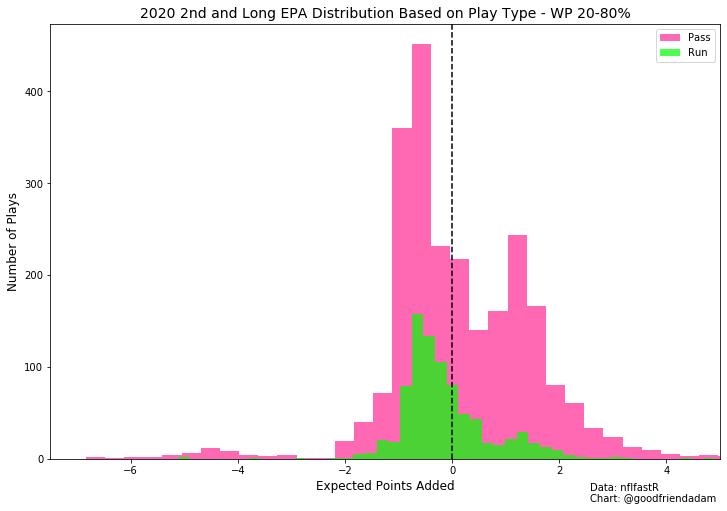

In [16]:
#Create figure and enter in a figsize
fig, ax = plt.subplots(figsize=(12,8))

passes = passvrush.loc[(passvrush['play_type']=='pass')]['epa']
rushes = passvrush.loc[(passvrush['play_type']=='run')]['epa']
#Place a histogram on the figure with the EPA of all pass plays
#Bins are how many groupings or buckets the data will be split into
#Assign a label for the legend and choose a color
plt.hist(passes, bins=50, label='Pass', color='hotpink')

#Place a second histogram this time for rush plays, 
#The alpha < 1 will make this somewhat transparent
plt.hist(rushes, bins=50, label='Run', alpha=.7, color='lime')

#Add labels and title
plt.xlabel('Expected Points Added',fontsize=12)
plt.ylabel('Number of Plays',fontsize=12)
plt.title('2020 2nd and Long EPA Distribution Based on Play Type - WP 20-80%',fontsize=14)

#Add source, the first two numbers are x and y 
#coordinates as a decimal of the whole image
plt.figtext(.75,.07,'Data: nflfastR', fontsize=10)
plt.figtext(.75,.05,'Chart: @goodfriendadam', fontsize=10)

#Add a legend
plt.legend()

plt.xlim(-7.5, 5.0)
ax.axvline(x=0, linestyle='--', color='black')

#Save the figure as a png
plt.savefig(os.getcwd() + '\\output\\2ndAndLong.png', dpi=400)

In [12]:
#cols = data.columns.tolist()
#cols